In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [3]:
# Set up api call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

In [4]:
print("Starting Data Request")
print("-----------------------------")

City = []	
Lat	= []
Lng	= []
Max_Temp = []	
Humidity = []	
Cloudiness = []	
Wind_Speed = []	
Country	= []
Date = []
Index_Counter = 0
Set_Counter= 1

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        City.append(response["name"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        if Index_Counter > 49:
            Index_Counter = 0
            Set_Counter = Set_Counter + 1
    
        else:
            Index_Counter = Index_Counter + 1
        
        print(f"Processing Record {Index_Counter} of Set {Set_Counter} : {City}")
    
    except(KeyError, IndexError):
        print("Oops, city not found")

print("-----------------------------")
print("Data Complete")

Starting Data Request
-----------------------------
Processing Record 1 of Set 1 : ['East London']
Processing Record 2 of Set 1 : ['East London', 'Busselton']
Oops, city not found
Oops, city not found
Processing Record 3 of Set 1 : ['East London', 'Busselton', 'Codrington']
Processing Record 4 of Set 1 : ['East London', 'Busselton', 'Codrington', 'Rikitea']
Processing Record 5 of Set 1 : ['East London', 'Busselton', 'Codrington', 'Rikitea', 'Batemans Bay']
Processing Record 6 of Set 1 : ['East London', 'Busselton', 'Codrington', 'Rikitea', 'Batemans Bay', 'Biltine']
Processing Record 7 of Set 1 : ['East London', 'Busselton', 'Codrington', 'Rikitea', 'Batemans Bay', 'Biltine', 'Vaini']
Processing Record 8 of Set 1 : ['East London', 'Busselton', 'Codrington', 'Rikitea', 'Batemans Bay', 'Biltine', 'Vaini', 'Mount Gambier']
Processing Record 9 of Set 1 : ['East London', 'Busselton', 'Codrington', 'Rikitea', 'Batemans Bay', 'Biltine', 'Vaini', 'Mount Gambier', 'Bukene']
Processing Record 10

In [5]:
# Create DataFrame
weather_dict = {"City": City, "Lat": Lat, "Lng": Lng, "Max Temp": Max_Temp, 
                "Humidity": Humidity, "Cloudiness": Cloudiness, 
                "Wind Speed": Wind_Speed, "Country": Country, "Date": Date}
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,59.94,94,0,5.75,ZA,1661534417
1,Busselton,-33.6500,115.3333,54.46,85,29,10.94,AU,1661534587
2,Codrington,-38.2667,141.9667,50.04,77,100,5.01,AU,1661534589
3,Rikitea,-23.1203,-134.9692,68.50,57,88,24.11,PF,1661534590
4,Batemans Bay,-35.7167,150.1833,53.10,88,84,4.45,AU,1661534590
...,...,...,...,...,...,...,...,...,...
559,Berdigestyakh,62.0989,126.6992,41.29,96,17,4.94,RU,1661534928
560,Broome,42.2506,-75.8330,80.98,61,20,13.80,US,1661534929
561,Maningrida,-12.0667,134.2667,65.82,75,2,7.92,AU,1661534930
562,Voinka,45.8699,33.9914,75.81,59,63,11.68,UA,1661534931


In [6]:
weather_df.to_csv("output_data/cities.csv", index = False)

In [7]:
# Preform analysis of data
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.664005,17.566676,69.529433,69.338652,52.384752,7.830816,1.661535e+09
std,33.678243,88.876395,15.117562,21.045511,37.267348,5.526604,1.225218e+02
min,-54.800000,-179.166700,33.420000,12.000000,0.000000,0.000000,1.661534e+09
25%,-8.113500,-58.886425,57.257500,59.000000,19.000000,3.895000,1.661535e+09
50%,26.680700,23.027950,72.825000,74.000000,50.000000,6.520000,1.661535e+09
75%,49.725075,92.822700,80.212500,85.000000,92.250000,10.360000,1.661535e+09
max,78.218600,178.416700,105.240000,100.000000,100.000000,35.680000,1.661535e+09


In [8]:
humidity_greater = weather_df.loc[weather_df["Humidity"] >100.00]
humidity_greater.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
# Plotting the Data

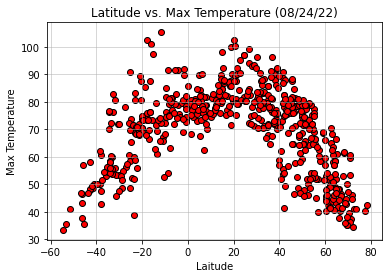

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "red", edgecolor = "black")
plt.title("Latitude vs. Max Temperature (08/24/22)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()
plt.savefig("Latitude vs Max Temperature.png")

In [11]:
# The further away from the equater, the colder the city.

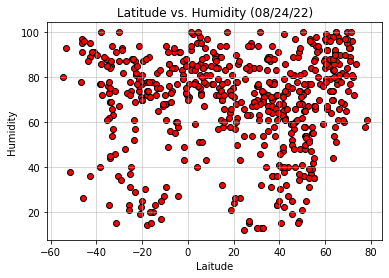

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "red", edgecolor = "black")
plt.title("Latitude vs. Humidity (08/24/22)")
plt.xlabel("Laitude")
plt.ylabel("Humidity")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()
plt.savefig("Latitude vs Humidity.png")

In [13]:
#Humidity is strongest within the first 40 points of either hemishpere. 

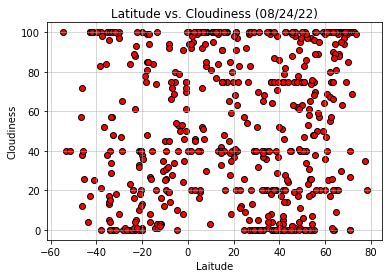

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "red", edgecolor = "black")
plt.title("Latitude vs. Cloudiness (08/24/22)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()
plt.savefig("Latitude vs Cloudiness.png")

In [15]:
# The extremes of cloudiness happen close fairly close to the equater.

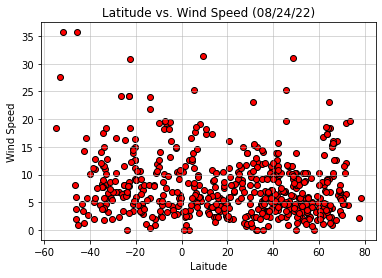

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "red", edgecolor = "black")
plt.title("Latitude vs. Wind Speed (08/24/22)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()
plt.savefig("Latitude vs Wind Speed.png")

In [17]:
# The further from the equater, the higher the wind speed.

In [18]:
# Linear Regression

In [19]:
# set latitude limits
northern_hemisphere = weather_df.loc[weather_df["Lat"]>=0]
southern_hemisphere = weather_df.loc[weather_df["Lat"]<0]

In [20]:
# function for linear regression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.71


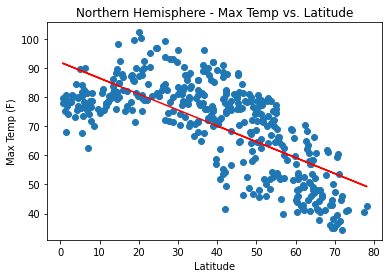

In [23]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude.png")

In [ ]:
# There is a strong negative correlation between max temp and latitude in the northern hemisphere.

The r-squared is : 0.71


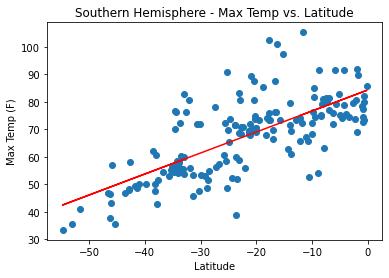

In [24]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude.png")

In [ ]:
# There is a strong positive correlation between max temp and latitude in the southern hemisphere.

The r-squared is : 0.02


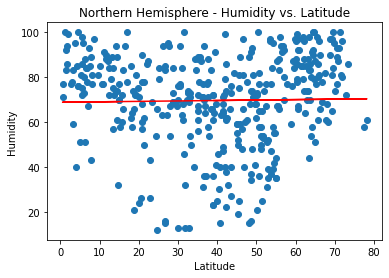

In [26]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Northern Hemisphere - Humidity vs. Latitude.png")

In [ ]:
# There is almost no correlation between humidity and latitude in the northern hemisphere.

The r-squared is : -0.08


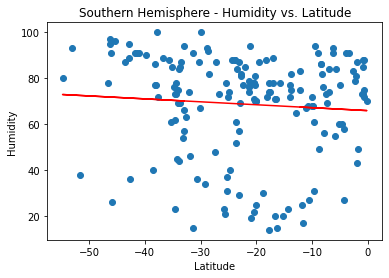

In [27]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Southern Hemisphere - Humidity vs. Latitude.png")

In [ ]:
# There is slightly more correlation in the souther hemispsere but, it is still almost no correlation between humidity and latitude.

The r-squared is : -0.01


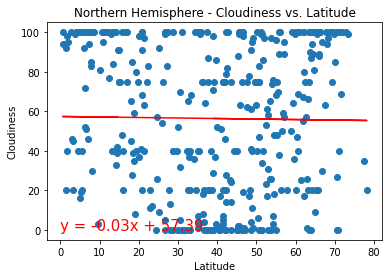

In [28]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Southern Hemisphere - Cloudiness vs. Latitude.png")

In [ ]:
# There is almost no correlation between cloudiness and latitude in the northern hemisphere.

The r-squared is : -0.04


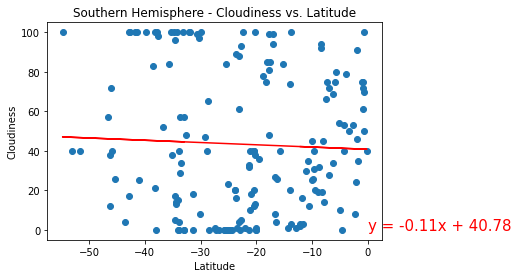

In [29]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Southern Hemisphere - Cloudiness vs. Latitude.png")

In [ ]:
# There is slightly more correlation in the souther hemispsere but, it is still almost no correlation between cloudiness and latitude.

The r-squared is : -0.03


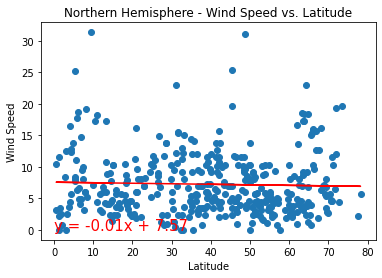

In [30]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Northern Hemisphere - Wind Speed vs. Latitude.png")

In [ ]:
# There is almost no correlation between Wind Speed and latitude in the northern hemisphere.

The r-squared is : -0.1


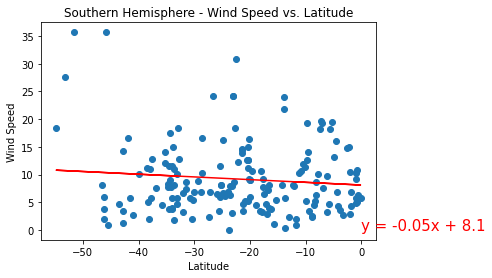

In [31]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Southern Hemisphere - Wind Speed vs. Latitude.png")

In [ ]:
# There is almost no correlation between Wind Speed and latitude in the southern hemisphere.